<a href="https://colab.research.google.com/github/maisonayman/Terrain-Prices-Reggression/blob/main/prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


In [23]:
df = pd.read_csv('/content/train.csv')
df

,id,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,...,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2,target
0,id_0,moor,860,384,29.9,0.06,14.7,0.4,6.5,0.2,...,0.59,1,0.24,19.2,2.1,4.9,0.49,19.53,384,8490.76
1,id_1,canyon,1294,543,7.1,0.63,0.8,9.0,9.5,5.2,...,1.23,1,0.62,114.9,12.5,3.8,0.81,21.63,543,13011.02
2,id_2,cliff,1130,1067,5.3,0.77,1.7,5.6,7.8,7.0,...,4.34,1,0.02,54.4,2.9,0.7,0.93,16.70,1067,16913.06
3,id_3,grove,1095,864,34.4,0.99,22.3,8.7,8.0,9.4,...,2.92,1,0.56,11.7,1.6,0.9,0.56,23.73,864,19270.35
4,id_4,grove,1638,1208,30.2,0.01,23.4,8.3,5.3,1.8,...,2.74,1,0.82,69.2,1.7,3.7,0.14,25.15,1208,30719.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,id_1495,plateau,1121,724,29.4,0.62,64.7,2.1,5.8,7.0,...,4.40,1,0.19,4.1,25.5,0.9,0.07,11.47,724,9684.05
1496,id_1496,forest,130,716,20.7,0.13,7.7,3.4,1.7,3.6,...,2.47,1,0.38,96.9,4.5,1.2,0.18,15.88,716,10802.92
1497,id_1497,canyon,2852,988,30.4,0.12,112.0,7.8,4.2,0.5,...,1.75,1,0.84,11.0,6.3,1.0,0.38,19.67,988,20356.20
1498,id_1498,cliff,1194,726,27.8,0.84,37.4,1.9,4.6,1.6,...,3.98,1,0.36,22.5,1.8,2.0,0.18,23.87,726,18820.83


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1500 non-null   object 
 1   location_type               1500 non-null   object 
 2   altitude                    1500 non-null   int64  
 3   area_sq_m                   1500 non-null   int64  
 4   slope_deg                   1500 non-null   float64
 5   soil_quality                1500 non-null   float64
 6   distance_city_center_km     1500 non-null   float64
 7   distance_to_school_km       1500 non-null   float64
 8   distance_to_hospital_km     1500 non-null   float64
 9   distance_to_market_km       1500 non-null   float64
 10  distance_to_industry_km     1500 non-null   float64
 11  proximity_road              1500 non-null   int64  
 12  proximity_water             1500 non-null   int64  
 13  urban_zone                  1500 

In [25]:
df.describe()


,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,distance_to_industry_km,proximity_road,...,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2,target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,1510.307333,808.857333,22.595333,0.488200,19.870667,5.063467,5.037867,4.949200,10.059333,0.502667,...,2.562053,0.506000,0.501420,49.273533,4.901467,2.046600,0.49954,20.127753,808.857333,16336.820593
std,869.062246,200.558303,12.912443,0.289817,20.115508,2.924687,2.836951,2.891921,5.679881,0.500160,...,1.451473,0.500131,0.285589,48.672760,4.777578,2.029807,0.28330,4.964707,200.558303,5963.580009
min,1.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.530000,130.000000,1352.530000
25%,767.500000,676.000000,11.400000,0.240000,6.075000,2.600000,2.700000,2.500000,5.200000,0.000000,...,1.300000,0.000000,0.260000,13.800000,1.600000,0.600000,0.26000,16.990000,676.000000,12010.932500
50%,1502.000000,809.000000,23.000000,0.480000,14.200000,5.050000,5.100000,4.900000,10.200000,1.000000,...,2.630000,1.000000,0.500000,34.200000,3.400000,1.500000,0.49000,20.265000,809.000000,15824.475000
75%,2221.000000,946.000000,33.825000,0.740000,27.050000,7.600000,7.400000,7.400000,14.900000,1.000000,...,3.832500,1.000000,0.742500,68.250000,6.700000,2.900000,0.74000,23.502500,946.000000,20174.357500
max,2999.000000,1499.000000,44.900000,1.000000,176.000000,10.000000,10.000000,10.000000,20.000000,1.000000,...,5.000000,1.000000,1.000000,428.200000,34.100000,17.800000,1.00000,36.840000,1499.000000,37781.130000


In [26]:
df.isnull().sum()


,0
id,0
location_type,0
altitude,0
area_sq_m,0
slope_deg,0
soil_quality,0
distance_city_center_km,0
distance_to_school_km,0
distance_to_hospital_km,0
distance_to_market_km,0


In [27]:
categorical_cols = df.select_dtypes(include="object").columns
numerical_cols = df.select_dtypes(exclude="object").columns


In [28]:
corr_matrix = df[numerical_cols].corr(method="spearman")
corr_matrix


,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,distance_to_industry_km,proximity_road,...,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2,target
altitude,1.000000,-0.023237,-0.038215,0.005126,-0.010282,0.006063,-0.008900,-0.018014,-0.013239,-0.008300,...,0.012624,-0.009458,0.030457,-0.001380,-0.017003,-0.012008,0.065650,0.029081,-0.023237,0.002336
area_sq_m,-0.023237,1.000000,-0.031439,-0.020056,0.007858,0.004296,0.015867,-0.014426,-0.009763,0.032100,...,0.019807,-0.026237,0.031465,-0.001790,0.020303,-0.029785,0.012090,0.042502,1.000000,0.695255
slope_deg,-0.038215,-0.031439,1.000000,-0.052282,0.008061,0.010072,-0.053998,-0.015234,0.026318,-0.041692,...,0.029278,0.057299,-0.002021,-0.026454,0.011388,-0.010392,-0.035660,-0.017558,-0.031439,-0.033334
soil_quality,0.005126,-0.020056,-0.052282,1.000000,-0.031074,-0.020942,0.047908,0.000524,-0.000106,-0.012470,...,-0.000692,0.024243,-0.028496,-0.020526,-0.001274,0.032393,0.061543,-0.009957,-0.020056,-0.018593
distance_city_center_km,-0.010282,0.007858,0.008061,-0.031074,1.000000,-0.002878,0.006379,0.008967,0.022098,0.077962,...,-0.023997,0.009004,0.018053,-0.030960,-0.014433,-0.023466,-0.055693,0.053958,0.007858,0.048006
distance_to_school_km,0.006063,0.004296,0.010072,-0.020942,-0.002878,1.000000,0.039948,0.023537,-0.006985,0.044992,...,0.049558,0.028141,0.036989,-0.017066,0.006685,-0.012492,0.010397,-0.010639,0.004296,0.004040
distance_to_hospital_km,-0.008900,0.015867,-0.053998,0.047908,0.006379,0.039948,1.000000,-0.001086,0.032029,0.017839,...,0.021667,-0.020199,-0.016355,-0.018659,-0.025811,0.017148,-0.016762,-0.031433,0.015867,-0.018568
distance_to_market_km,-0.018014,-0.014426,-0.015234,0.000524,0.008967,0.023537,-0.001086,1.000000,-0.009644,-0.025508,...,0.004387,0.002108,-0.001798,0.020108,0.043150,0.006208,-0.001884,-0.026699,-0.014426,-0.029850
distance_to_industry_km,-0.013239,-0.009763,0.026318,-0.000106,0.022098,-0.006985,0.032029,-0.009644,1.000000,-0.011446,...,0.023758,0.008670,-0.004076,-0.034587,-0.007249,-0.024164,0.012317,0.045727,-0.009763,0.024250
proximity_road,-0.008300,0.032100,-0.041692,-0.012470,0.077962,0.044992,0.017839,-0.025508,-0.011446,1.000000,...,0.008457,-0.009398,-0.014028,-0.002836,0.033183,0.008861,-0.027893,-0.032552,0.032100,-0.009977


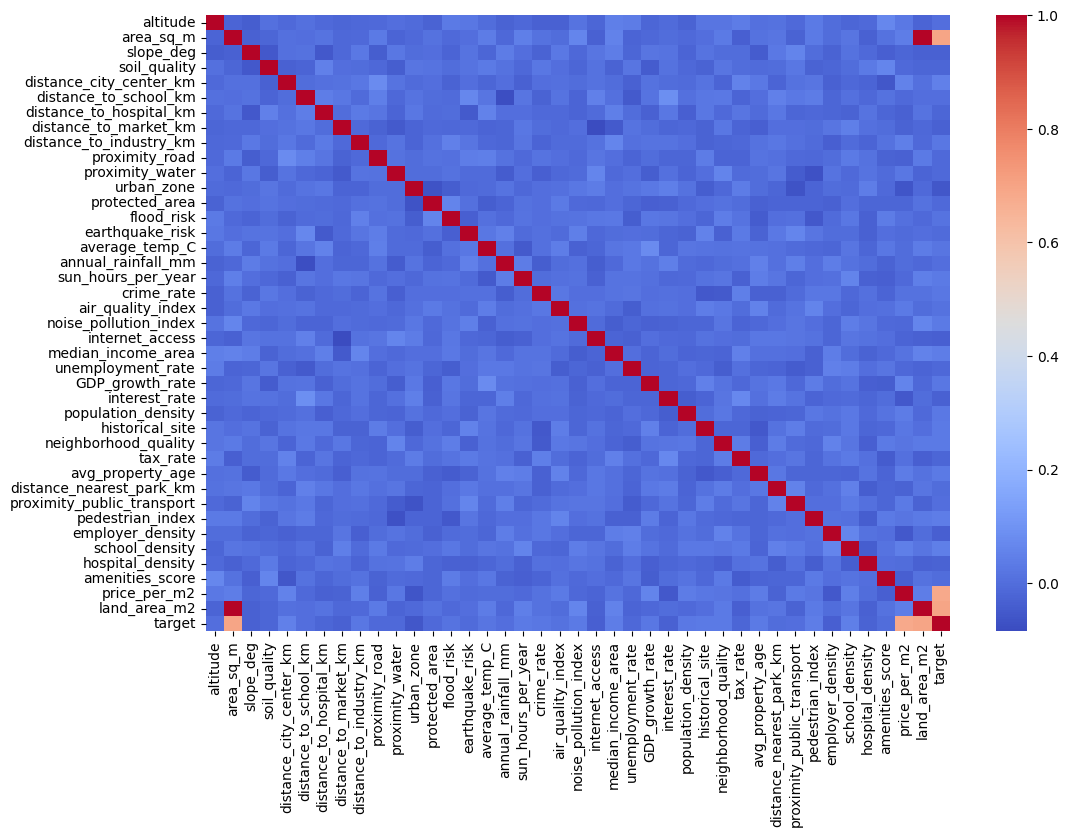

In [29]:


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


In [30]:
corr_with_target = corr_matrix["target"].sort_values(ascending=False)
corr_with_target


,target
target,1.000000
land_area_m2,0.695255
area_sq_m,0.695255
price_per_m2,0.684964
distance_city_center_km,0.048006
school_density,0.046688
pedestrian_index,0.039647
median_income_area,0.038938
neighborhood_quality,0.033077
avg_property_age,0.032593


In [31]:
for col in categorical_cols:
    print(df.groupby(col)["target"].mean())


id
id_0        8490.76
id_1       13011.02
id_10       9620.53
id_100     16475.78
id_1000    10851.04
             ...   
id_995     18013.93
id_996     12578.21
id_997     16534.19
id_998     17302.57
id_999     20159.34
Name: target, Length: 1500, dtype: float64
location_type
bay          15151.738837
beach        15740.415185
canyon       17786.037660
cliff        15492.580769
coast        17445.936667
delta        16242.322105
desert       16764.045405
field        15290.067561
forest       17387.981892
glacier      16425.730000
gorge        16700.928571
grove        16504.600500
highlands    16215.883529
hill         16307.995926
island       15631.395000
jungle       18803.186538
lagoon       15262.678780
lake         16508.563636
lowlands     16440.730811
marsh        15950.585897
meadow       16479.124048
moor         18717.299189
mountain     17639.410938
oasis        16087.065238
pasture      15972.283333
peninsula    17057.101905
plain        16082.911842
plateau      15611

In [32]:
x = df.drop(['id','target','proximity_public_transport','land_area_m2'], axis=1)
y = df['target']
x

,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,distance_to_industry_km,...,land_use,zoning_code,avg_property_age,distance_nearest_park_km,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2
0,moor,860,384,29.9,0.06,14.7,0.4,6.5,0.2,11.8,...,commercial,D,11.4,0.59,0.24,19.2,2.1,4.9,0.49,19.53
1,canyon,1294,543,7.1,0.63,0.8,9.0,9.5,5.2,18.0,...,industrial,B,18.9,1.23,0.62,114.9,12.5,3.8,0.81,21.63
2,cliff,1130,1067,5.3,0.77,1.7,5.6,7.8,7.0,15.9,...,residential,D,31.3,4.34,0.02,54.4,2.9,0.7,0.93,16.70
3,grove,1095,864,34.4,0.99,22.3,8.7,8.0,9.4,10.9,...,residential,C,28.1,2.92,0.56,11.7,1.6,0.9,0.56,23.73
4,grove,1638,1208,30.2,0.01,23.4,8.3,5.3,1.8,8.4,...,commercial,A,32.0,2.74,0.82,69.2,1.7,3.7,0.14,25.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,plateau,1121,724,29.4,0.62,64.7,2.1,5.8,7.0,10.5,...,agricultural,A,11.1,4.40,0.19,4.1,25.5,0.9,0.07,11.47
1496,forest,130,716,20.7,0.13,7.7,3.4,1.7,3.6,5.8,...,industrial,B,13.1,2.47,0.38,96.9,4.5,1.2,0.18,15.88
1497,canyon,2852,988,30.4,0.12,112.0,7.8,4.2,0.5,11.9,...,industrial,C,28.2,1.75,0.84,11.0,6.3,1.0,0.38,19.67
1498,cliff,1194,726,27.8,0.84,37.4,1.9,4.6,1.6,0.5,...,agricultural,D,16.4,3.98,0.36,22.5,1.8,2.0,0.18,23.87


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Redefine numerical_cols and categorical_cols based on the 'x' DataFrame
numerical_cols = x.select_dtypes(exclude="object").columns
categorical_cols = x.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

gradientboost_model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", GradientBoostingRegressor())
])

gradientboost_model.fit(X_train, y_train)
print(
    r2_score(y_test, gradientboost_model.predict(X_test))
)

0.9692480208006484


In [36]:
test_df = pd.read_csv("/content/test.csv")

In [37]:
test_predictions = gradientboost_model.predict(test_df)


In [38]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "target": test_predictions
})


In [39]:
submission.to_csv("predictions.csv", index=False)
